In [1]:
%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2

import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

resourcePath = './res/DIP3E_Original_Images_CH02/'

def add_gaussian_noise(image_in, noise_sigma):
    temp_image = np.float64(np.copy(image_in))

    h = temp_image.shape[0]
    w = temp_image.shape[1]
    noise = np.random.randn(h, w) * noise_sigma

    noisy_image = np.zeros(temp_image.shape, np.float64)
    if len(temp_image.shape) == 2:
        noisy_image = temp_image + noise
    else:
        noisy_image[:,:,0] = temp_image[:,:,0] + noise
        noisy_image[:,:,1] = temp_image[:,:,1] + noise
        noisy_image[:,:,2] = temp_image[:,:,2] + noise

    """
    print('min,max = ', np.min(noisy_image), np.max(noisy_image))
    print('type = ', type(noisy_image[0][0][0]))
    """

    return noisy_image

## Arithmetic Operations

### Add

(598, 566)


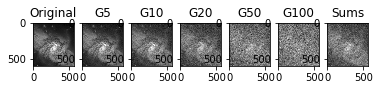

In [2]:
im = cv.imread(resourcePath + 'Fig0226(galaxy_pair_original).tif', cv.IMREAD_GRAYSCALE)

print(im.shape)
im1 = add_gaussian_noise(im, 5)
im2 = add_gaussian_noise(im, 10)
im3 = add_gaussian_noise(im, 20)
im4 = add_gaussian_noise(im, 50)
im5 = add_gaussian_noise(im, 100)
#imres = cv.add(cv.add(cv.add(cv.add(im1, im2), im3), im4), im5)
imres = (im1 + im2 + im3 + im4 + im5) / 5

plt.subplot(171),plt.imshow(im, 'gray'),plt.title('Original')
plt.subplot(172),plt.imshow(im1, 'gray'),plt.title('G5')
plt.subplot(173),plt.imshow(im2, 'gray'),plt.title('G10')
plt.subplot(174),plt.imshow(im3, 'gray'),plt.title('G20')
plt.subplot(175),plt.imshow(im4, 'gray'),plt.title('G50')
plt.subplot(176),plt.imshow(im5, 'gray'),plt.title('G100')
plt.subplot(177),plt.imshow(imres, 'gray'),plt.title('Sums')
plt.show()

### Difference

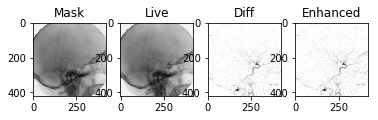

In [3]:
im1 = cv.imread(resourcePath + 'Fig0228(a)(angiography_mask_image).tif', cv.IMREAD_GRAYSCALE)
im2 = cv.imread(resourcePath + 'Fig0228(b)(angiography_live_ image).tif', cv.IMREAD_GRAYSCALE)

imdiff = cv.absdiff(im2, im1)
imdiff = cv.bitwise_not(imdiff)
norm_image = cv.normalize(imdiff, None, 0, 255, cv.NORM_MINMAX)

#clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#cl1 = clahe.apply(imdiff)
#hist = cv.calcHist(norm_image, [0], None, [256], [0,256])
#plt.hist(norm_image.flatten(),256,[0,256], color = '-r')

plt.subplot(141),plt.imshow(im1, 'gray'),plt.title('Mask')
plt.subplot(142),plt.imshow(im2, 'gray'),plt.title('Live')
plt.subplot(143),plt.imshow(imdiff, 'gray'),plt.title('Diff')
plt.subplot(144),plt.imshow(norm_image, 'gray'),plt.title('Enhanced')
plt.show()

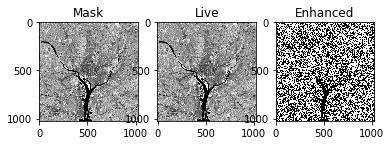

In [4]:
im1 = cv.imread(resourcePath + 'Fig0227(a)(washington_infrared).tif', cv.IMREAD_GRAYSCALE)
im2 = cv.imread(resourcePath + 'Fig0227(b)(washington_infrared).tif', cv.IMREAD_GRAYSCALE)

#h = im2.shape[0]
#w = im2.shape[1]
#for y in range(0, h):
#    for x in range(0, w):
#        im2[y, x] = im2[y, x] & int(0b11111110)

imdiff = cv.absdiff(im2, im1)
norm_image = cv.normalize(imdiff, None, 0, 255, cv.NORM_MINMAX)

plt.subplot(131),plt.imshow(im1, 'gray'),plt.title('Mask')
plt.subplot(132),plt.imshow(im2, 'gray'),plt.title('Live')
plt.subplot(133),plt.imshow(norm_image, 'gray'),plt.title('Enhanced')
plt.show()

### Multiply

####  Shading Correction

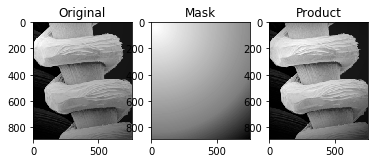

In [5]:
im1 = cv.imread(resourcePath + 'Fig0229(a)(tungsten_filament_shaded).tif', cv.IMREAD_GRAYSCALE)
alpha = cv.imread(resourcePath + 'Fig0229(b)(tungsten_sensor_shading).tif', cv.IMREAD_GRAYSCALE)

im11 = im1.astype(float)
alpha = alpha.astype(float)/255
alpha_flipped = cv.flip( alpha, -1 )

immult1 = cv.multiply(alpha, im11)
immult2 = cv.multiply(alpha_flipped, immult1)
immult2 = cv.normalize(immult2, None, 0, 255, cv.NORM_MINMAX)

plt.subplot(131),plt.imshow(im1, 'gray'),plt.title('Original')
plt.subplot(132),plt.imshow(alpha, 'gray'),plt.title('Mask')
plt.subplot(133),plt.imshow(immult2, 'gray'),plt.title('Product')
plt.show()

#### Masking

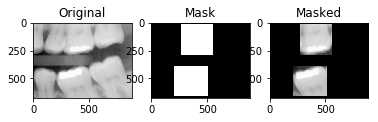

In [6]:
im = cv.imread(resourcePath + 'Fig0230(a)(dental_xray).tif', cv.IMREAD_GRAYSCALE)
immask = cv.imread(resourcePath + 'Fig0230(b)(dental_xray_mask).tif', cv.IMREAD_GRAYSCALE)

immult = cv.bitwise_and(im, im, mask = immask)

plt.subplot(131),plt.imshow(im, 'gray'),plt.title('Original')
plt.subplot(132),plt.imshow(immask, 'gray'),plt.title('Mask')
plt.subplot(133),plt.imshow(immult, 'gray'),plt.title('Masked')
plt.show()

### Set and Logical Operations

#### Union

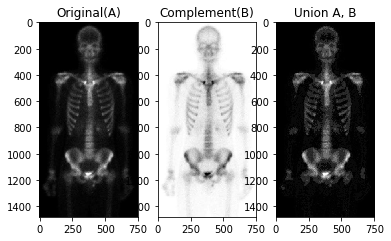

In [7]:
im = cv.imread(resourcePath + 'Fig0232(a)(partial_body_scan).tif', cv.IMREAD_GRAYSCALE)
imcomp = cv.bitwise_not(im)

imconst = np.full(im.shape, 20, np.uint8)
imunion = cv.bitwise_or(im, imconst)

plt.subplot(131),plt.imshow(im, 'gray'),plt.title('Original(A)')
plt.subplot(132),plt.imshow(imcomp, 'gray'),plt.title('Complement(B)')
plt.subplot(133),plt.imshow(imunion, 'gray'),plt.title('Union A, B')
plt.show()

### Spatial Operations

#### Neighborhood operations

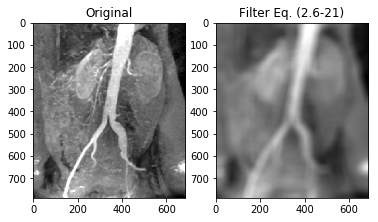

In [8]:
im = cv.imread(resourcePath + 'Fig0235(c)(kidney_original).tif', cv.IMREAD_GRAYSCALE)
m = n = 41

kernel = np.ones((m, n),np.float32) / (m * n)
dest = cv.filter2D(im, -1, kernel)

plt.subplot(121),plt.imshow(im, 'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(dest, 'gray'),plt.title('Filter Eq. (2.6-21)')
plt.show()

#### Geometric spatial transformations

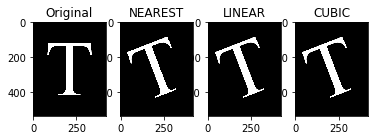

In [9]:
im = cv.imread(resourcePath + 'Fig0236(a)(letter_T).tif', cv.IMREAD_GRAYSCALE)
degree = 21
rows, cols = im.shape
M = cv.getRotationMatrix2D(((cols - 1) / 2.0, (rows - 1) / 2.0), degree, 1)
imrotate1 = cv.warpAffine(im, M, (cols,rows), flags= cv.INTER_NEAREST)
imrotate2 = cv.warpAffine(im, M, (cols,rows), flags= cv.INTER_LINEAR) 
#INTER_LINEAR_EXACT cause kernel restart
imrotate3 = cv.warpAffine(im, M, (cols,rows), flags= cv.INTER_CUBIC)

plt.subplot(141),plt.imshow(im, 'gray'),plt.title('Original')
plt.subplot(142),plt.imshow(imrotate1, 'gray'),plt.title('NEAREST')
plt.subplot(143),plt.imshow(imrotate2, 'gray'),plt.title('LINEAR')
plt.subplot(144),plt.imshow(imrotate3, 'gray'),plt.title('CUBIC')
plt.show()

#### Image Registration

In [10]:
# TODO

#### Image Transformation

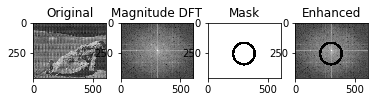

In [11]:
# TODO
im = cv.imread(resourcePath + 'apollo.png', cv.IMREAD_GRAYSCALE)

dft = cv.dft(np.float32(im),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

mask = np.full(im.shape, 255.0, np.uint8)
mask = cv.circle(mask, (int(im.shape[0] / 2) + 70, int(im.shape[1] / 2) - 50), 90, 0, thickness=20)

immult = cv.bitwise_and(magnitude_spectrum, magnitude_spectrum, mask = mask)

plt.subplot(141),plt.imshow(im, 'gray'),plt.title('Original')
plt.subplot(142), plt.imshow(magnitude_spectrum, 'gray'),plt.title('Magnitude DFT')
plt.subplot(143),plt.imshow(mask, 'gray'),plt.title('Mask')
plt.subplot(144),plt.imshow(immult, 'gray'),plt.title('Enhanced')
plt.show()